# Der Kaffee wird kalt - Beispiele zu Wärmeleitung und -strahlung

**Autor: Christoph T. Koch, Humboldt-Universität zu Berlin, Institut für Physik**

**Kurs: Physik 1 - Mechanik und Wärmelehre**

Frage: Wann wird der Kaffee schneller kühler, wenn man die Milch sofort hinzugibt, oder wenn man sie erst später (z.B. nach 12 min) hinzugibt.

## A: Wärmeleitung

Verwendete Formeln:

Wärmestrom $P_L = \frac{\Delta T}{R_{th}}$

Wärmelkapazität: $Q =  m \cdot c \cdot \Delta T$


Die von der Tasse pro Zeit abgegebene Wäremenge ist gleich dem Wäremestrom, der durch die Tasse nach außen geht. Normalerweise müssten wir an dieser Stelle auch noch die Wärmestrahlung berücksichtigen, aber wir nehmen vereinfachend an, dass die Außenwand der Tasse z.B. durch ein Wasserbad auf Raumtemperatur gehalten wird:

$$P_L(\Delta T) + \frac{dQ}{dt} = 0 \Rightarrow \frac{dQ}{dt} = -\frac{\Delta T}{R_{th}} $$

Aus der Gleichung für die Wärmekapazität erhalten wir 

$$ dQ =  m \cdot c \cdot d \Delta T$$

Setzen wir dies in die vorherige Gleichung ein, erhalten wir

$$ m \cdot c \cdot R_{th} \cdot  \frac{d \Delta T}{dt} = -\Delta T \Rightarrow 
 \frac{d \Delta T}{\Delta T} = -\frac{dt}{m \cdot c \cdot R_{th}}$$

Wir nehmen an, dass wir anfangs eine Temperaturdifferenz zwischen heißem Kaffee und Raumtemperatur von $\Delta T_0 = T_{Kaffee} - T_{Raum}$ haben. Um den Kaffee trinken zu können, soll er eine Temperaturdifferenz von $\Delta T_{Ziel} = T_{Ziel} - T_{Raum}$ haben. Wenn wir die obige Gleichung integrieren, erhalten wir

$$ \int_{\Delta T_0}^{\Delta T_{Ziel}} \frac{d \Delta T}{\Delta T}  = \int_0^{t_{Ziel}} \frac{dt}{m \cdot c \cdot R_{th}} 
\Rightarrow \ln\left(\frac{\Delta T_{Ziel}}{\Delta T_0}\right) = -\frac{t_{Ziel}}{m \cdot c \cdot R_{th}} $$

Exponentieren wir diesesn Ausdruck, erhalten wir:

$$\frac{\Delta T_{Ziel}}{\Delta T_{0}} = e^{\frac{-t_{Ziel}}{m \cdot c \cdot R_{th}}} \Rightarrow \Delta T (t) = \Delta T_0 e^{\frac{-t_{Ziel}}{m \cdot c \cdot R_{th}}} $$

Aber wir können auch direkt nach der zeit umstellen:

$$ t_{Ziel} = -\ln\left(\frac{\Delta T_{Ziel} }{\Delta T_0 }\right) \cdot m \cdot c \cdot R_{th} $$

Tasse Kaffee: $m_{Kaffee} = 0.2$ kg, $m_{Milch} = 40$ g, $c_{Kaffee} = c_{Milch}= c_{H2O} = 4186 \frac{J}{kg \cdot K}$

Temperaturen: $T_{Raum} = 20^{\circ}C = T_R$, $T_{Kaffee} = 80^{\circ}C = T_K$, $T_{Milch} = 20^{\circ}C$. Die Zieltemperatur des Kaffees soll $T_{Ziel} = 40^{\circ}C$ sein, so dass man ihn trinken kann.


In [1]:
import numpy as np

mKaffe_kg = 0.2 # Masse des Kaffees
mMilch_kg = 0.04 # Masse der Milch
cH2O_JkgK = 4186 # spez. Wärmekapazität von Kaffee und Milch
Rth_KW = 1      # Thermischer Widerstand der Tasse
TKaffe_C = 80   # Temperatur des Kaffees
TMilch_C = 20    # Temperatur der Milch
TRaum_C = 20     # Raumtemperatur
TZiel_C = 40     # Zieltemperatur des Kaffees 

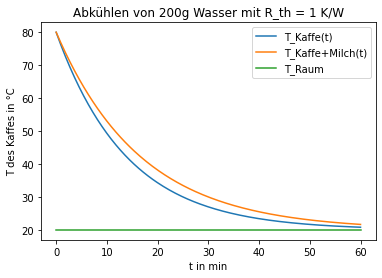

In [2]:
# Darstellung der Zeitabhängigkeit der Temperatur
import matplotlib.pyplot as plt
t_s = np.linspace(0,3600,200)

deltaT0 = TKaffe_C-TRaum_C
T1_C = TRaum_C + deltaT0*np.exp(-t_s/(mKaffe_kg*cH2O_JkgK*Rth_KW))
T2_C = TRaum_C + deltaT0*np.exp(-t_s/((mKaffe_kg+mMilch_kg)*cH2O_JkgK*Rth_KW))
plt.plot(t_s/60,T1_C,label='T_Kaffe(t)')
plt.plot(t_s/60,T2_C,label='T_Kaffe+Milch(t)')
plt.plot(t_s/60,TRaum_C*np.ones(t_s.shape),label='T_Raum')
plt.xlabel('t in min')
plt.ylabel('T des Kaffes in °C')
plt.title('Abkühlen von 200g Wasser mit R_th = 1 K/W')
plt.legend()

## Fall 1: Die Milch wird sofort in den Kaffee geschüttet:

Zunächst berechnen wir die Mischtemperatur, wenn der Kaffee am Anfang dazugegeben wird. Wir verwenden

$$T_{Misch} = \frac{c_{H2O} m_{Kaffe} T_{Kaffe} + c_{H2O} m_{Milch} T_{Milch}}{c_{H2O} m_{Kaffe}  + c_{H2O} m_{Milch} } =
\frac{m_{Kaffe} T_{Kaffe} + m_{Milch} T_{Milch}}{m_{Kaffe}  + m_{Milch} } $$

In [3]:
TMisch_C = (mKaffe_kg*TKaffe_C + mMilch_kg*TMilch_C) / (mKaffe_kg + mMilch_kg)
print("Mischtemperatur von Kaffee und Milch, bei heißem Kaffee: TMisch = {0:.2f} °C.".format(TMisch_C))

Mischtemperatur von Kaffee und Milch, bei heißem Kaffee: TMisch = 70.00 °C.


Jetzt berechnen wir die Zeit, die das Kaffee-Milch-Gemisch benötigt, um $T_{Ziel}$ zu erreichen. Wir verwenden

$$ t_{Ziel} = -\ln\left(\frac{\Delta T_{Ziel} }{T_{Misch}-T_{Raum} }\right) \cdot \left(m_{Kaffe} + m_{Milch}\right) \cdot c_{H2O} \cdot R_{th} $$

In [4]:
deltaTZiel_C =  TZiel_C-TRaum_C
deltaT0_C =  TMisch_C-TRaum_C
tZiel_s = -np.log(deltaTZiel_C/deltaT0_C)*(mKaffe_kg+mMilch_kg)*cH2O_JkgK*Rth_KW
tZiel_min = tZiel_s/60
print("Zeit, bis {0:.2f}°C heißes Kaffe-Milch-Gemisch TZiel = {1:.2f}°C erreicht hat: t={2:.2f} min".
      format(TMisch_C,TZiel_C,tZiel_min))

Zeit, bis 70.00°C heißes Kaffe-Milch-Gemisch TZiel = 40.00°C erreicht hat: t=15.34 min



## Fall 2: Die Milch wird später in den Kaffee geschüttet:

Welche Temperatur muss der Kaffee haben, so dass er, wenn mit 20°C kalter Milch gemischt, die Zieltemperatur (=Mischtemperatur) von 40°C hat?


$$T_{Misch} = \frac{m_{Kaffe} T_{Kaffe} + m_{Milch} T_{Milch}}{m_{Kaffe}  + m_{Milch} }  \Rightarrow
 T_{Kaffe,2} = \frac{T_{Misch} \left(m_{Kaffe} + m_{Milch}\right) -  m_{Milch} T_{Milch}}{m_{Kaffe}} $$

In [5]:
TKaffe2_C = (TZiel_C * (mKaffe_kg + mMilch_kg) - mMilch_kg*TMilch_C)/mKaffe_kg
print("Der Kaffee sollte {0:.2f} °C warm sein, damit er beim Mischen mit kalter Milch TZiel = {1:.2f} °C erreicht.".
      format(TKaffe2_C,TZiel_C))

Der Kaffee sollte 44.00 °C warm sein, damit er beim Mischen mit kalter Milch TZiel = 40.00 °C erreicht.


Als nächstes müssen wir berechnen, wie lange der heiße Kaffe (ohne Milch) abkühlen muss, um 44°C zu erreichen. Hierzu müssen wir nur die Masse des Kaffes beim Abkühlen berücksichtigen, und die Zieltemperatur ist auch etwas höher - beides Gründe, die für eine kürzere Zeit sorgen:

$$ t_{Ziel} = -\ln\left(\frac{\Delta T_{Ziel} }{T_{Kaffe}-T_{Raum}}\right) \cdot m_{Kaffe} \cdot c_{H2O} \cdot R_{th} $$

In [6]:
deltaTZiel2_C =  TKaffe2_C-TRaum_C
deltaT0_C =  TKaffe_C-TRaum_C
tZiel2_s = -np.log(deltaTZiel2_C/deltaT0_C)*mKaffe_kg*cH2O_JkgK*Rth_KW
tZiel2_min = tZiel2_s/60
print("Zeit, bis {0:.2f}°C heißer Kaffe ohne Milch TZiel = {1:.2f}°C erreicht hat: t={2:.2f} min".
      format(TKaffe_C,TKaffe2_C,tZiel2_min))

Zeit, bis 80.00°C heißer Kaffe ohne Milch TZiel = 44.00°C erreicht hat: t=12.79 min


## B: Wärmestrahlung

Im 2. Beispiel soll die Wärme über Wärmestrahlung abgegeben werden. Hier verwenden wir das Stefan-Bolzmann-Gesetz:

$$P(T) = \epsilon \cdot \sigma \cdot A \cdot T^4$$

Die Tasse (bei Temperatur $T_{Tasse} = T_{Kaffe}$) gibt Strahlung an die Umgebung ab, ist aber auch der Strahlung der Umgebung (bei Temperatur $T_{Raum}$) ausgesetzt. Wir vernachlässigen hier die Wärmeleitung der Tasse selbst, indem wir annehmen, dass die Tasse die Wärme sehr gut leitet (z.B. ist sie aus Metall). Somit ist die Balance der abgegebenen Wärmemenge der Tasse pro Zeit und der Strahlung der Tasse, sowie der Strahlung der Umgebung gegeben mit:

$$\frac{dQ_{Kaffe}}{dt} + P_{Tasse}(T_{Tasse}(t)) - P_{Umgebung}(T_{Raum}) = 0 \Rightarrow \frac{dQ_{Kaffe}}{dt} = -\epsilon \cdot\sigma \cdot A \cdot \left(T_{Tasse}^4-T_{Raum}^4\right)$$

mit dem gleichen Ansatz für die Wärmekapazität 

$$ dQ =  m \cdot c \cdot d \Delta T$$

erhalten wir

$$ m \cdot c \cdot  \frac{d \Delta T}{dt} = -\epsilon \cdot\sigma \cdot A \cdot \left(T_{Tasse}^4-T_{Raum}^4\right) \\ \Rightarrow 
 \frac{d \Delta T}{T_{Tasse}^4-T_{Raum}^4} = \frac{d \Delta T}{\Delta T\left(T_{Tasse}+T_{Raum}\right)\left(T_{Tasse}^2+T_{Raum}^2\right)} =  -\frac{\epsilon \cdot\sigma \cdot A \cdot dt}{m \cdot c }$$

Bevor wir integrieren, definieren wir zunächst $x = \frac{\Delta T}{T_{Raum}}$, so dass

$$ \frac{d \Delta T}{\Delta T\left(T_{Tasse}+T_{Raum}\right)\left(T_{Tasse}^2+T_{Raum}^2\right)} = 
\frac{ T_{Raum} d x}{T_{Raum}^4 x \left(x+2\right)\left(x^2 + 2(x+1)\right)}$$

Das Integral dieses Ausdrucks ist

$$\frac{1}{T_{Raum}^3}  \int_{x_1}^{x_2} \frac{ T_{Raum} d x}{T_{Raum}^4 x \left(x+2\right)\left(x^2 + 2(x+1)\right)}
= \frac{1}{T_{Raum}^3} \left[\frac{1}{4}\ln\left(|x| \right) -\frac{1}{4}\ln\left(|x+2|\right)-\frac{1}{2} \tan^{-1}\left(x+1\right) \right]_{x_1}^{x_2}$$

$$\Rightarrow \frac{1}{4}\ln\left(\frac{\Delta T_2}{\Delta T_1} \right) -\frac{1}{4}\ln\left(\frac{\Delta T_2+2T_{Raum}}{\Delta T_1+2T_{Raum}}\right)-\frac{1}{2} \left[\tan^{-1}\left(\frac{\Delta T_2+T_{Raum}}{T_{Raum}}\right) - \tan^{-1}\left(\frac{\Delta T_1+T_{Raum}}{T_{Raum}}\right) \right] = -T_{Raum}^3 \frac{\epsilon \cdot\sigma \cdot A}{m \cdot c } t $$

Somit ergibt sich für die Zeit, nach der die Tasse von der Temperaturdifferenz $\Delta T_1$ auf die Temperaturdifferenz $\Delta T_2$ abgekühlt ist

$$ t = \frac{m \cdot c}{ \epsilon \cdot\sigma \cdot A}  \frac{1}{4 T_{Raum}^3} \left[\ln\left(\frac{\Delta T_1}{\Delta T_2} \right) + \ln\left(\frac{\Delta T_2+2T_{Raum}}{\Delta T_1+2T_{Raum}}\right)+2\tan^{-1}\left(\frac{\Delta T_2+T_{Raum}}{T_{Raum}}\right) - 2 \tan^{-1}\left(\frac{\Delta T_1+T_{Raum}}{T_{Raum}}\right) \right]  $$

Wir sehen, dass die Abkühlzeit mit der Masse des Kaffes und dessen Wärmekapazität zunimmt, aber auch mit zunehmender Oberfläche der Tasse abnimmt. Wir erkennen auch, dass eine Temperaturdifferenz von $\Delta T_{2} = 0$ in diesem Ausdruck nicht definiert ist und auch nicht erreicht werden kann (würde unendlich lange dauern, da $\ln(0) = -\infty$).

Im folgenden berechnen wir die Zeit, die benötigt wird, um von verschiedenen Anfangstemperaturen auf eine Temperatur von $T_{Ziel} = 40^{\circ}C$ abzukühlen, d.h. $\Delta T_2 = T_{Ziel} - T_{Raum} = 20$ K.




Text(0.5, 0, 'Zeit in min')

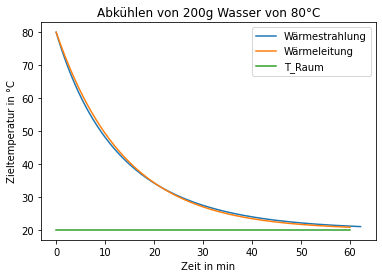

In [15]:
epsilon     = 1  # wir nehmen an, die Tasse sei ein schwarzer Strahler
A_m2        = 0.15 # Strahlende Oberfläche der Tasse in m^2  
sigma_Wm2K4 = 5.6704e-8  # Stefan-Boltzmann-Konstante 
TRaum_K     = 20+273.15

deltaT1_K  = 60 # Starttemperatur ist 100°C, d.h. 80 K über Raumtemperatur
deltaT2_K  = np.linspace(1,deltaT1_K,500)
tRad_s = (mKaffe_kg*cH2O_JkgK/(epsilon*sigma_Wm2K4*A_m2*4*(TRaum_K**3)
                         ))*(np.log(deltaT1_K/deltaT2_K)+np.log((deltaT2_K+2*TRaum_K)/(deltaT1_K+2*TRaum_K))+
                             2*np.arctan2((deltaT2_K+TRaum_K),TRaum_K)-2*np.arctan2((deltaT1_K+TRaum_K),TRaum_K))
tRad_min = tRad_s/60
plt.plot(tRad_min,TRaum_C+deltaT2_K,label='Wärmestrahlung')
plt.plot(t_s/60,T1_C,label='Wärmeleitung')
plt.plot(t_s/60,TRaum_C*np.ones(t_s.shape),label='T_Raum')
plt.legend()
plt.title('Abkühlen von 200g Wasser von 80°C')
plt.ylabel('Zieltemperatur in °C')
plt.xlabel('Zeit in min')